In [1]:
from utils import *
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Segoe UI Symbol','simHei','Arial','sans-serif']

## Load Data

In [2]:
years = [2016,2017]
resampling_period = '60T'

data = load_resample_data(years, resampling_period)
windfarms_names = data.columns.tolist()    

year:2016	(105408, 20)
year:2017	(105120, 20)
resampled to  (17544, 20)


## Normalize Data

In [3]:
# normalized_data = normalize_data_mycode(data)

## Convert original numerical data into categorical representation

In [4]:
alphabet_size=5
alphabets = list(string.ascii_uppercase[:alphabet_size]) # ['A', 'B', 'C', 'D', 'E' , ...]
alphabets = [ "○" , '◔', '◑', '◕', "●"] #  "○" , '◔', '◑', '◕', "●"  OR '▁ ','▃ ', '▄ ', '▆ ', '█ '

In [5]:
# Very slow: Do not run
# categorical_reps = categorical_rep_mycode(data.iloc[:,-20:],alphabet_size)
# t = time.time()dd
# kk = [  ''.join(categorical_reps.loc[j][0][i] for j in range(20)) for i in range(L)]
# time.time() - t

In [6]:
categorical_reps_df = categorical_rep_mycode_df(data.iloc[:,-20:],data.columns, alphabet_size, alphabets)
categorical_reps_df.head(3)

,AKE1,ARD1,BSR1,BTR1,BUL1,BUL2,CR1,CRE3,CRR1,GWW1,HAL1,IEW1,IEW2,KHW1,NEP1,OWF1,SCR2,SCR3,SCR4,TAB1
DT,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,●,●,○,◕,◕,●,●,◕,◕,●,●,◑,◔,●,●,●,●,●,●,◑
2016-01-01 01:00:00,◕,◕,◔,◑,◕,●,●,◕,◕,●,●,◑,◔,●,●,●,●,●,●,◑
2016-01-01 02:00:00,●,◕,◔,◑,◕,●,●,◕,◑,◕,●,◑,◔,●,●,●,●,●,●,◕


In [7]:
categorical_reps_joined = categorical_reps_df.iloc[:,:].apply(lambda x: ''.join(x), axis = 1)
categorical_reps_joined.head(5)

DT
2016-01-01 00:00:00    ●●○◕◕●●◕◕●●◑◔●●●●●●◑
2016-01-01 01:00:00    ◕◕◔◑◕●●◕◕●●◑◔●●●●●●◑
2016-01-01 02:00:00    ●◕◔◑◕●●◕◑◕●◑◔●●●●●●◕
2016-01-01 03:00:00    ●◕◔◕◕◕●◑◑◕●◔○◕●●●●●●
2016-01-01 04:00:00    ●◕◑◕◕◕●◑◑◕●◔◔●●●◕●◕◕
Freq: 60T, dtype: object

### Find the most frequent patterns of a set of time series

In [8]:
Frequent_patterns = find_most_frequent_patterns_set_timeseries(categorical_reps_joined)
Frequent_patterns.head(10)
prob_frequent_patterns = Frequent_patterns/(data.shape[0] )
prob_frequent_patterns.head(10)

,Frequency
Pattern,
○○○○○○○○○○○○○○○○○○○○,0.09
○○○○◔◔○○○○○○○○○○○○○○,0.01
○○○○○○○○○○○○○○○○○○◔○,0.01
○○○○◔○○○○○○○○○○○○○○○,0.01
○○○○○○○○○○◔○○○◔○○○○○,0.01
○○○○◔◑○○○○○○○○○○○○○○,0.01
○○◔○○○○○○○○○○○○○○○○○,0.01
○○○○◑◑○○○○○○○○○○○○○○,0.00
○○◔○○○○○○○○○○○○○○○◔○,0.00


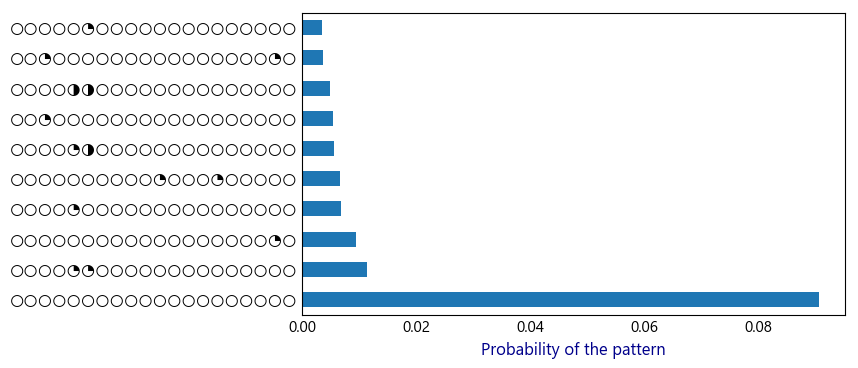

In [9]:
fig, ax = plt.subplots(1, 1,figsize=(7,4), dpi=100)
prob_frequent_patterns.iloc[:10,:].plot(kind='barh', ax = ax, legend = False)

ax.tick_params(axis='x', labelsize = 11, which='major', pad=0, rotation=0 , color = 'w')
ax.tick_params(axis='y', labelsize = 12, which='major', pad=0, rotation=0 , color = 'w')
# ax.set_title('Windfarm', fontsize=9)
# ax.set_xticklabels(dataframe.index, color = 'w')
# ax.set_ylim(bottom=0, top = 1)
ax.set_xlabel('Probability of the pattern',fontsize=12, color = 'darkblue')
ax.set_ylabel('',fontsize=11)
# ax.set_xticklabels(motifs, color = 'k')

fig.savefig('Most frequent pattern of joint operation of 20 windfarsms.pdf', 
            papertype='letter', dpi = 300, bbox_inches='tight')    

### Plot heatmap of co-occurrence (coincidence) of power generation of each windfarm vs. other windfarms

In [ ]:
str1 = list(categorical_reps_df.iloc[:,0])
str2 = list(categorical_reps_df.iloc[:,1])

# Compute confusion matrix
cnf_matrix = confusion_matrix(str1, str2)
cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis] #Normalize it
print(cnf_matrix)
np.set_printoptions(precision=2)

fig, ax = plt.subplots(dpi=110) # figsize=(7,7)
plot_confusion_matrix(cnf_matrix, classes=alphabets, normalize=True, x_label='First series', y_label='Second series',
                      title='Joint probabilty', cmap = 'GnBu')

##########################################################################################################3
fig, ax = plt.subplots(dpi=110) # figsize=(7,7)

im, cbar = heatmap(cnf_matrix, alphabets, alphabets, cmap="YlGn", cbarlabel="Joint Probabilty")
texts = annotate_heatmap(im, valfmt="{x:.2f} ")  # >> this gives a warning
fig.tight_layout()
